In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from pathlib import Path
from matplotlib.ticker import FuncFormatter

C:\Users\Nell\anaconda3\envs\ese-msc\lib\site-packages\geopandas\_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1dev-CAPI-1.14.1) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
# load and view our geopandas dataframe
file_path = Path('district_data/new_maha_district.shp')
maha_geo_df = gpd.read_file(file_path)
maha_geo_df.head()

,fid,nam,laa,geometry
0,1.0,MAHARASHTRA,NANDURBAR,"POLYGON Z ((74.14090 21.95300 0.00000, 74.1419..."
1,2.0,MAHARASHTRA,DHULE,"POLYGON Z ((74.86766 21.62875 0.00000, 74.8687..."
2,3.0,MAHARASHTRA,NASHIK,"POLYGON Z ((74.13781 20.85971 0.00000, 74.1439..."
3,4.0,MAHARASHTRA,JALGAON,"POLYGON Z ((75.24092 21.41340 0.00000, 75.2451..."
4,5.0,MAHARASHTRA,AURANGABAD,"POLYGON Z ((75.70490 20.66223 0.00000, 75.7020..."


In [3]:
# check data types, will be useful before merging
maha_geo_df.dtypes

fid          float64
nam           object
laa           object
geometry    geometry
dtype: object

In [5]:
maha_divisions = maha_geo_df.drop_duplicates(subset=['laa']).reset_index(drop = True)

<AxesSubplot:>

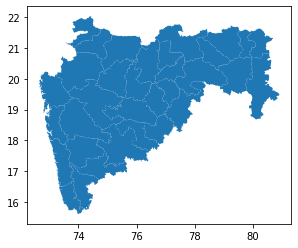

In [6]:
# now let's preview what our map looks like with no data in it
maha_divisions.plot()

In [7]:
# load in new csv file
file_path = Path('district_data/main_maha_data.csv')
main_data_df = pd.read_csv(file_path)
main_data_df.head()

,District,Population,Increase,Literacy,Density,Division
0,Thane,"11,060,148",36.01,84.53,1157,Konkan
1,Pune,"9,429,408",30.37,86.15,603,Pune
2,Mumbai Suburban,"9,356,962",8.29,89.91,20980,Konkan
3,Nashik,"6,107,187",22.30,82.31,393,Nashik
4,Nagpur,"4,653,570",14.40,88.39,470,Nagpur


In [8]:
main_data_df['District'] = main_data_df['District'].str.upper()
main_data_df.head()

,District,Population,Increase,Literacy,Density,Division
0,THANE,"11,060,148",36.01,84.53,1157,Konkan
1,PUNE,"9,429,408",30.37,86.15,603,Pune
2,MUMBAI SUBURBAN,"9,356,962",8.29,89.91,20980,Konkan
3,NASHIK,"6,107,187",22.30,82.31,393,Nashik
4,NAGPUR,"4,653,570",14.40,88.39,470,Nagpur


In [9]:
#check data types are the same before merging
main_data_df.dtypes

District       object
Population     object
Increase      float64
Literacy      float64
Density         int64
Division       object
dtype: object

In [10]:
# join the geodataframe with the cleaned up csv dataframe
merged = maha_divisions.set_index('laa').join(main_data_df.set_index('District'))
merged.head()

,fid,nam,geometry,Population,Increase,Literacy,Density,Division
laa,,,,,,,,
NANDURBAR,1.0,MAHARASHTRA,"POLYGON Z ((74.14090 21.95300 0.00000, 74.1419...","1,648,295",25.66,64.38,277,Nashik
DHULE,2.0,MAHARASHTRA,"POLYGON Z ((74.86766 21.62875 0.00000, 74.8687...","2,050,862",20.08,72.80,285,Nashik
NASHIK,3.0,MAHARASHTRA,"POLYGON Z ((74.13781 20.85971 0.00000, 74.1439...","6,107,187",22.30,82.31,393,Nashik
JALGAON,4.0,MAHARASHTRA,"POLYGON Z ((75.24092 21.41340 0.00000, 75.2451...","4,229,917",14.86,78.20,360,Nashik
AURANGABAD,5.0,MAHARASHTRA,"POLYGON Z ((75.70490 20.66223 0.00000, 75.7020...","3,701,282",27.76,79.02,366,Aurangabad


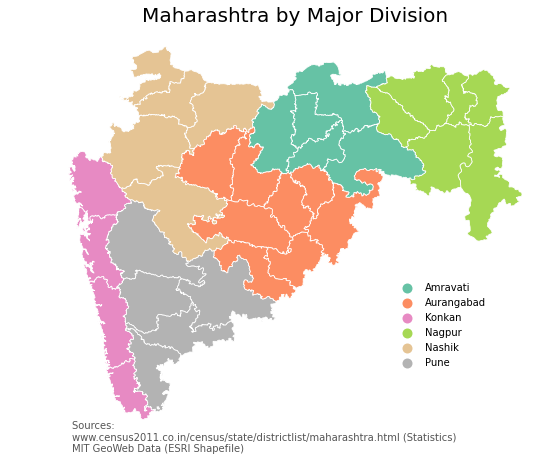

In [61]:
fig, ax = plt.subplots(1, figsize=(10,6))
merged.plot(column='Division', categorical=True, cmap='Set2', linewidth=.8, edgecolor='1.0',
         legend=True, legend_kwds={'bbox_to_anchor':(0.9, 0.4),'fontsize':10,'frameon':False}, ax=ax)
ax.axis('off')
plt.tight_layout()

# add a title
ax.set_title('Maharashtra by Major Division', \
              fontdict={'fontsize': '20',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Sources: \nwww.census2011.co.in/census/state/districtlist/maharashtra.html (Statistics)\nMIT GeoWeb Data (ESRI Shapefile)',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# this will save the figure as a high-res png. 
fig.savefig('nell_maha_div_pop.png', bbox_inches='tight', dpi=300)


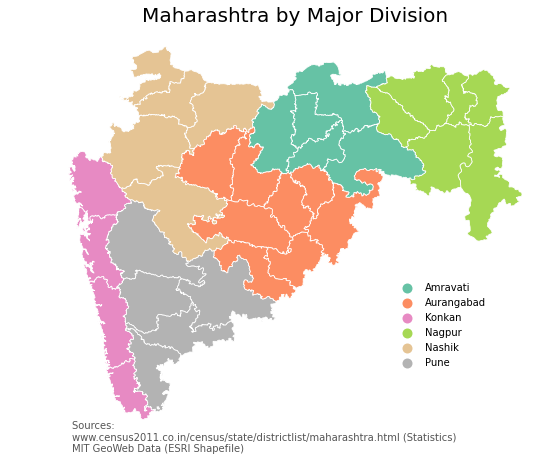

In [62]:
fig, ax = plt.subplots(1, figsize=(10,6))
merged.plot(column='Division', categorical=True, cmap='Set2', linewidth=.8, edgecolor='1.0',
         legend=True, legend_kwds={'bbox_to_anchor':(0.9, 0.4),'fontsize':10,'frameon':False}, ax=ax)
ax.axis('off')
plt.tight_layout()

# add a title
ax.set_title('Maharashtra by Major Division', \
              fontdict={'fontsize': '20',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Sources: \nwww.census2011.co.in/census/state/districtlist/maharashtra.html (Statistics)\nMIT GeoWeb Data (ESRI Shapefile)',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# this will save the figure as a high-res png. 
fig.savefig('nell_maha_div_pop_labels.png', bbox_inches='tight', dpi=300)